## Final Project Submission

Please fill out:
* Student name: Farnaz Golnam
* Student pace: Full time
* Scheduled project review date/time: Jan 27, 1PM PST
* Instructor name: Rafael Carrasco
* Blog post URL: https://datasciencefordesigners.wordpress.com/2020/01/27/data-driven-decision-making/


In [1]:
# import necessary libraries to begin with:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from glob import glob

In [47]:
#get the csv files
csv_files = glob("zippedData\\*.csv.gz")
csv_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [48]:
#create data frames from each file to check the information and clean the data :
df_title_basics= pd.read_csv(csv_files[3])
df_title_basics    

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [49]:
#getting basic information of the dataframe:
print(df_title_basics.columns, "\n\n")
print(df_title_basics.isna().sum(), "\n\n" )
print(df_title_basics.info(), "\n\n")
print(df_title_basics.shape, )

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object') 


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None 


(146144, 6)


In [50]:
# cleaning the dataframe and comparing the results,
df_title_basics_clean=df_title_basics.dropna(subset=["genres"], how="any")
print(df_title_basics.shape)
print(df_title_basics.dropna(subset=["genres"], how="any").shape)

# to join our datadrames later, we match the column names we want to join on,
# in this data frame we change the primary_title to movie,
df_title_basics_clean.columns=["tconst", "movie", "original_title", "start_year", "runtime_minutes", "genres"]
df_title_basics_clean

(146144, 6)
(140736, 6)


,tconst,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [51]:
# writing a function to count genres and their number of accurance in the table:

def genre_count(df,col):
    genre_dict={}
    for genres in df[col]:
        for genre in genres.split(","):
            if genre in genre_dict:
                genre_dict[genre]+=1
            else:
                genre_dict[genre]=1
    
    
    return genre_dict

In [52]:
df_movies=pd.read_csv(csv_files[7])
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [53]:
print(df_movies.columns, "\n\n")
print(df_movies.isna().sum(), "\n\n" )
print(df_movies.info())

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object') 


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), objec

In [54]:
# clean the data frame and sort values of required column:
df_movies_clean=df_movies.drop(["Unnamed: 0","id","original_title","genre_ids"],axis=1, inplace=False)
df_movies_clean.sort_values("popularity",ascending=False).head(10)

,original_language,popularity,release_date,title,vote_average,vote_count
23811,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,en,78.123,2014-10-24,John Wick,7.2,10081
23812,en,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,en,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,en,50.289,2012-05-04,The Avengers,7.6,19673
11021,en,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,en,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,en,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,en,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,en,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


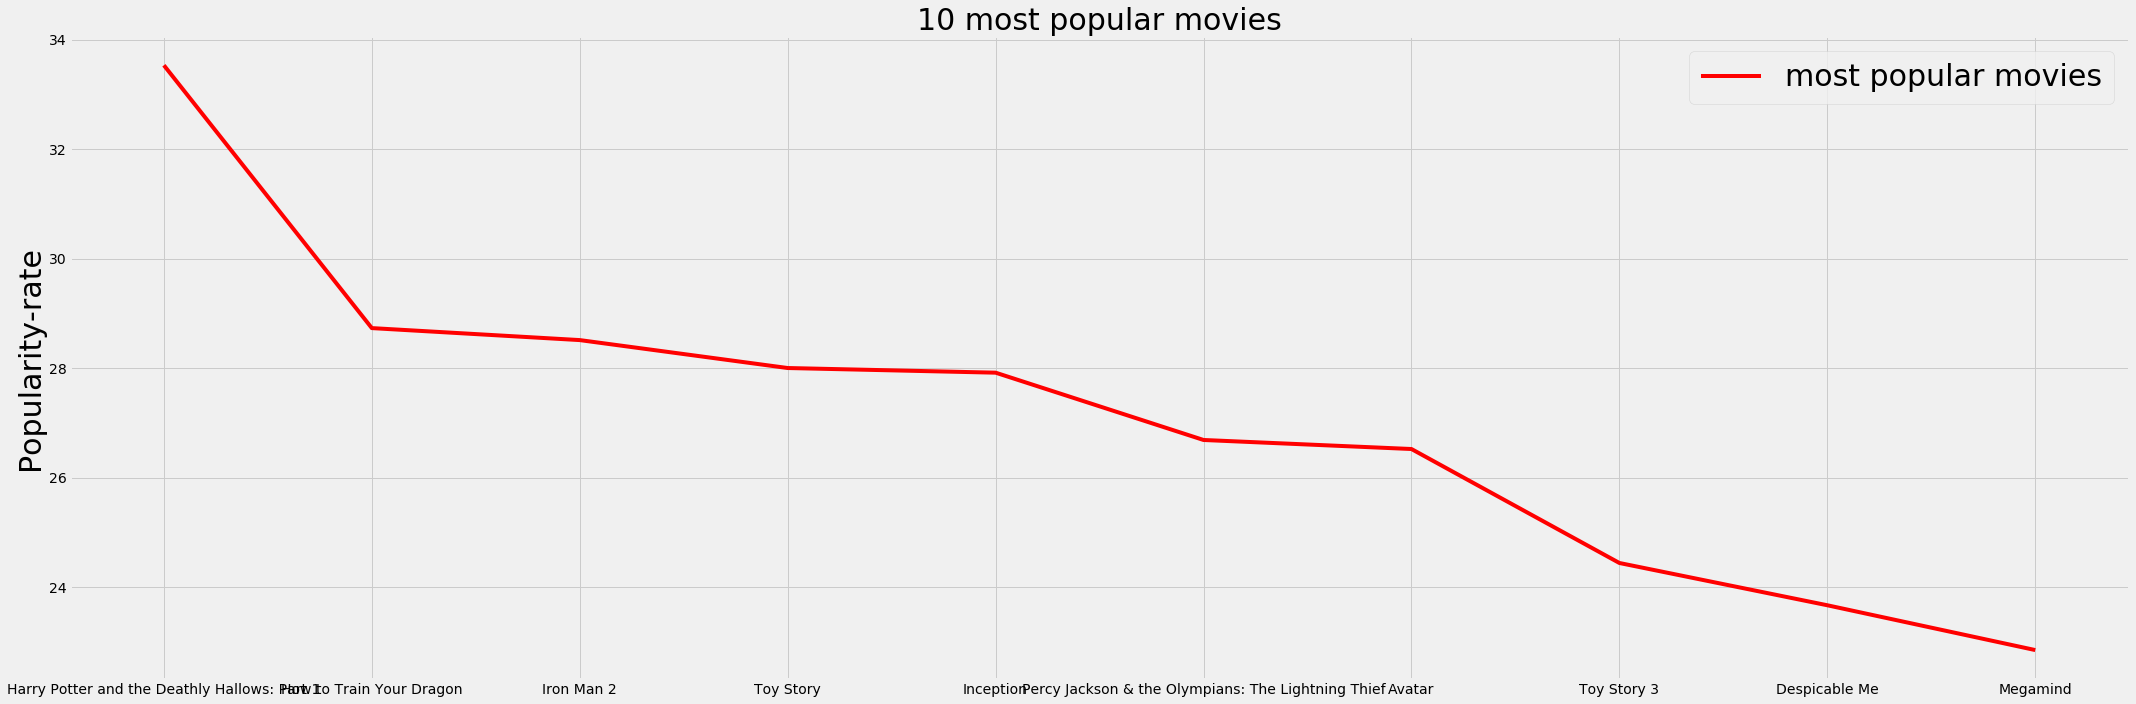

In [59]:
# create a plot to show the top 10 popular movies name:
plt.figure(figsize=(30,10))
plt.style.use("fivethirtyeight")
plt.plot(df_movies_clean.title.head(10),df_movies_clean.popularity.head(10),color="r",label="most popular movies")
plt.legend(fontsize=30)
plt.title("10 most popular movies", fontsize=30)
plt.tight_layout()
plt.ylabel("Popularity-rate", fontsize=30)
plt.show()

In [14]:
df_movie_budgets=pd.read_csv(csv_files[8])
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
print(df_movie_budgets.columns, "\n\n")
print(df_movie_budgets.isna().sum(), "\n\n" )
print(df_movie_budgets.info())

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object') 


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [17]:
# convert dollors to int to sort the values based on the budget numbers:
movie_budgets_clean = df_movie_budgets.production_budget.str.replace(",", "").str.replace("$", "").astype(float)
domestic_gross_clean = df_movie_budgets.domestic_gross.str.replace(",", "").str.replace("$", "").astype(float)
worldwide_gross_clean = df_movie_budgets.worldwide_gross.str.replace(",", "").str.replace("$", "").astype(float)

#create a new data frame with the cleaned datas:
movie_net_clean=worldwide_gross_clean - movie_budgets_clean
frame={"movie":df_movie_budgets["movie"] ,"movie_budgets":movie_budgets_clean, "domestic_gross":domestic_gross_clean,"worldwide_gross":worldwide_gross_clean,"movie_net":movie_net_clean}
df_movie_budgets_clean=pd.DataFrame(frame)

df_movie_budgets_clean

,movie,movie_budgets,domestic_gross,worldwide_gross,movie_net
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
...,...,...,...,...,...
5777,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03
5778,Following,6000.0,48482.0,2.404950e+05,2.344950e+05
5779,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03
5780,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03


In [18]:
#now we join the two dataframes on movie columns: 
pd_merge = pd.merge(df_title_basics_clean, df_movie_budgets_clean, how='inner', on="movie")
pd_merge

,tconst,movie,original_title,start_year,runtime_minutes,genres,movie_budgets,domestic_gross,worldwide_gross,movie_net
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",45000000.0,0.0,73706.0,-44926294.0
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",20000000.0,70433227.0,122133227.0,102133227.0
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",25000000.0,720828.0,9313302.0,-15686698.0
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,25000000.0,720828.0,9313302.0,-15686698.0
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,25000000.0,720828.0,9313302.0,-15686698.0
...,...,...,...,...,...,...,...,...,...,...
3738,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",2500000.0,174255.0,174255.0,-2325745.0
3739,tt9729206,Diner,Diner,2019,NaN,Crime,5000000.0,12592907.0,12592907.0,7592907.0
3740,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",22000000.0,23530831.0,27882226.0,5882226.0
3741,tt9844102,Ray,Ray,2018,111.0,Crime,40000000.0,75305995.0,124823094.0,84823094.0


In [19]:
# review the top 100 movies based on their net sales:
df_title_basics_budget=pd_merge.sort_values("movie_net", ascending=False).head(100)
df_title_basics_budget

,tconst,movie,original_title,start_year,runtime_minutes,genres,movie_budgets,domestic_gross,worldwide_gross,movie_net
1693,tt1775309,Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2710,tt2495766,Titanic,Titanic,2012,NaN,Adventure,200000000.0,659363944.0,2.208208e+09,2.008208e+09
2711,tt8852130,Titanic,Titanic,2018,115.0,Family,200000000.0,659363944.0,2.208208e+09,2.008208e+09
3295,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09
10,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...,...,...,...
1385,tt1637725,Ted,Ted,2012,106.0,"Comedy,Fantasy",50000000.0,218665740.0,5.560166e+08,5.060166e+08
1274,tt1596343,Fast Five,Fast Five,2011,130.0,"Action,Crime,Thriller",125000000.0,210031325.0,6.301635e+08,5.051635e+08
123,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",165000000.0,188017894.0,6.663794e+08,5.013794e+08
36,tt0454876,Life of Pi,Life of Pi,2012,127.0,"Adventure,Drama,Fantasy",120000000.0,124987022.0,6.209120e+08,5.009120e+08


In [20]:
final_genre_count=genre_count(df_title_basics_budget,"genres")   
print(final_genre_count)

{'Horror': 4, 'Adventure': 66, 'Family': 12, 'Action': 44, 'Sci-Fi': 26, 'Crime': 4, 'Thriller': 11, 'Drama': 16, 'Sport': 2, 'Fantasy': 23, 'Romance': 4, 'Animation': 19, 'Comedy': 22, 'Musical': 5, 'Biography': 2, 'Music': 1, 'Documentary': 4, 'History': 1, 'Mystery': 1}


In [21]:
#to make a bar chart from our dictionary:
#prepare elements of the charts
values = []
labels = []

for genre, count in final_genre_count.items():
    labels.append(genre)
    values.append(count) 
    

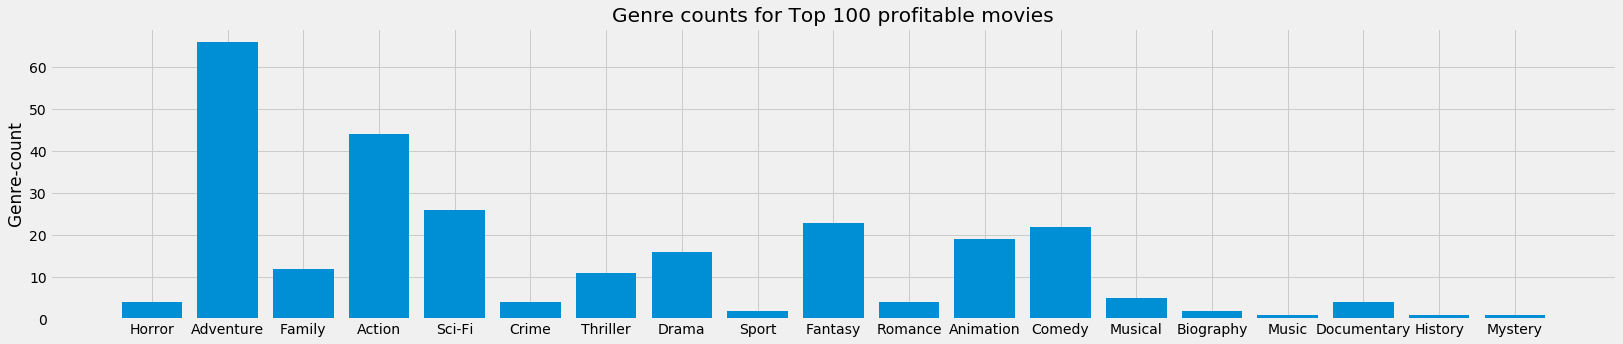

In [22]:
plt.figure(figsize=(25, 5))
plt.bar(labels,values)
plt.title("Genre counts for Top 100 profitable movies")
plt.ylabel("Genre-count")
plt.show()
#according to this graph adventure movies are more popular, we only consider the top 100 best selling movies

Budget  0  $ 1400.0  to $ 4550000.0
Budget  1  $ 4550000.0  to $ 16000000.0
Budget  2  $ 16000000.0  to $ 40000000.0
Budget  3  $ 40000000.0  to $ 425000000.0


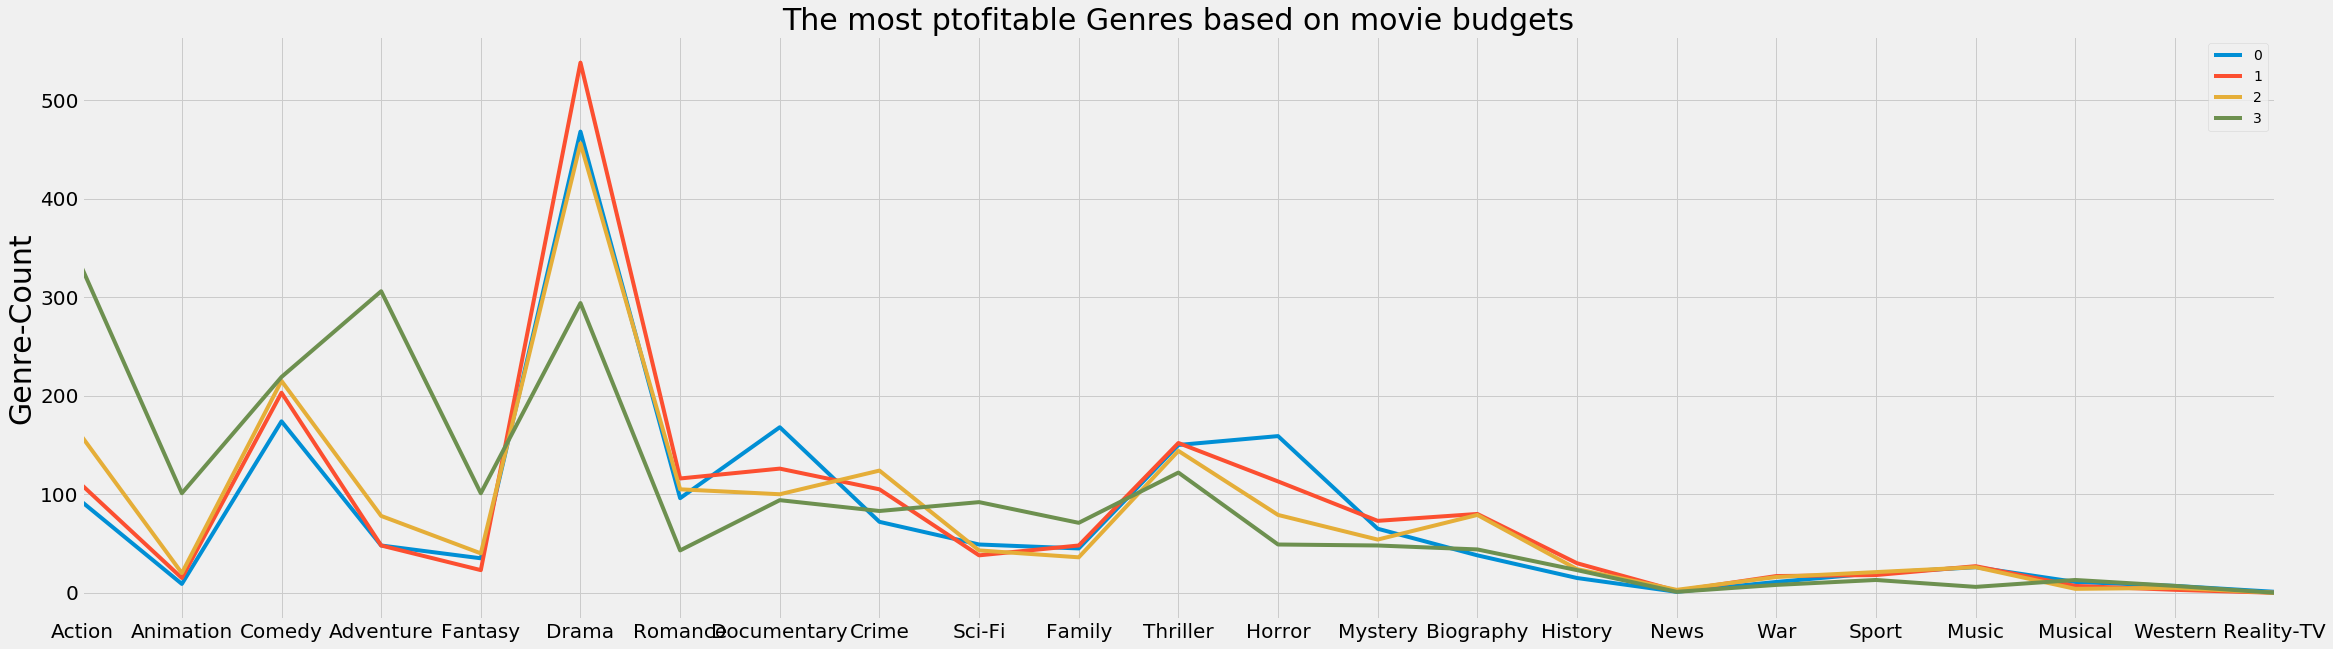

                 0      1      2      3
Action        92.0  109.0  158.0  329.0
Animation      9.0   15.0   20.0  101.0
Comedy       174.0  203.0  215.0  219.0
Adventure     48.0   48.0   78.0  306.0
Fantasy       35.0   23.0   40.0  101.0
Drama        468.0  538.0  456.0  294.0
Romance       96.0  116.0  105.0   43.0
Documentary  168.0  126.0  100.0   94.0
Crime         72.0  105.0  124.0   83.0
Sci-Fi        49.0   38.0   43.0   92.0
Family        45.0   48.0   36.0   71.0
Thriller     150.0  152.0  144.0  122.0
Horror       159.0  113.0   79.0   49.0
Mystery       65.0   73.0   54.0   48.0
Biography     38.0   80.0   79.0   44.0
History       15.0   30.0   24.0   23.0
News           1.0    2.0    3.0    1.0
War           11.0   17.0   16.0    8.0
Sport         20.0   18.0   21.0   13.0
Music         26.0   27.0   26.0    6.0
Musical       11.0    7.0    4.0   13.0
Western        7.0    3.0    5.0    7.0
Reality-TV     1.0    0.0    0.0    0.0


In [60]:
# increamental quantil movie budget

total_genre=genre_count(pd_merge,"genres")
step=4
total_genre_count=len(total_genre)
df2 = pd.DataFrame(np.zeros((total_genre_count,step)), index=total_genre.keys())

for q in range(0, step):
    start_q=pd_merge["movie_budgets"].quantile(q/step)
    end_q=pd_merge["movie_budgets"].quantile(q/step+1.0/step)
    print("Budget ", q," $", start_q, " to $", end_q)
    
    p=pd_merge[(pd_merge.movie_budgets<end_q) & (start_q<pd_merge.movie_budgets)]
    p_genre_count=genre_count(p,"genres")
    
    for key, value in total_genre.items() :
        if key in p_genre_count.keys():
            #print("genre: ", key, " : ", p_genre_count[key])
            df2.loc[key,q]=p_genre_count[key]
    
              
df2.plot(figsize=(35,10), linewidth=4, fontsize=20)
plt.xticks(range(len(total_genre)),total_genre.keys())
plt.title("The most ptofitable Genres based on movie budgets",fontsize=30)
plt.ylabel("Genre-Count",fontsize=30)
plt.show()
print(df2)


In [26]:
# another way of running the above code clock, without nested for loops:
q0=pd_merge["movie_budgets"].quantile(0.0)
q1=pd_merge["movie_budgets"].quantile(0.25)
q2=pd_merge["movie_budgets"].quantile(0.5)
q3=pd_merge["movie_budgets"].quantile(0.75)
q4=pd_merge["movie_budgets"].quantile(1)
print([q0,q1,q2,q3])

p1=pd_merge[pd_merge.movie_budgets<q1]
p1_final_genre_count=genre_count(p1,"genres")
p1_final_genre_count

values_1 = []
labels_1 = []

for genre, count in p1_final_genre_count.items():
    labels_1.append(genre)
    values_1.append(count)
    
#print(values_1)
#print(labels_1)


p2=pd_merge[(pd_merge.movie_budgets>q1) & (pd_merge.movie_budgets<=q2)]
p2_final_genre_count=genre_count(p2,"genres")
p2_final_genre_count

values_2 = []
labels_2 = []

for genre, count in p2_final_genre_count.items():
    labels_2.append(genre)
    values_2.append(count)
    
#print(values_2)
#print(labels_2)


p3=pd_merge[(pd_merge.movie_budgets>q2) & (pd_merge.movie_budgets<=q3)]
p3_final_genre_count=genre_count(p3,"genres")
p3_final_genre_count

values_3 = []
labels_3 = []

for genre, count in p3_final_genre_count.items():
    labels_3.append(genre)
    values_3.append(count)
    
#print(values_3)
#print(labels_3)



p4=pd_merge[(pd_merge.movie_budgets>q3) & (pd_merge.movie_budgets<=q4)]
p4_final_genre_count=genre_count(p4,"genres")
p4_final_genre_count


values_4 = []
labels_4 = []

for genre, count in p4_final_genre_count.items():
    labels_4.append(genre)
    values_4.append(count)
    
#print(values_4)
#print(labels_4)

[1400.0, 4550000.0, 16000000.0, 40000000.0]


<function matplotlib.pyplot.show(*args, **kw)>

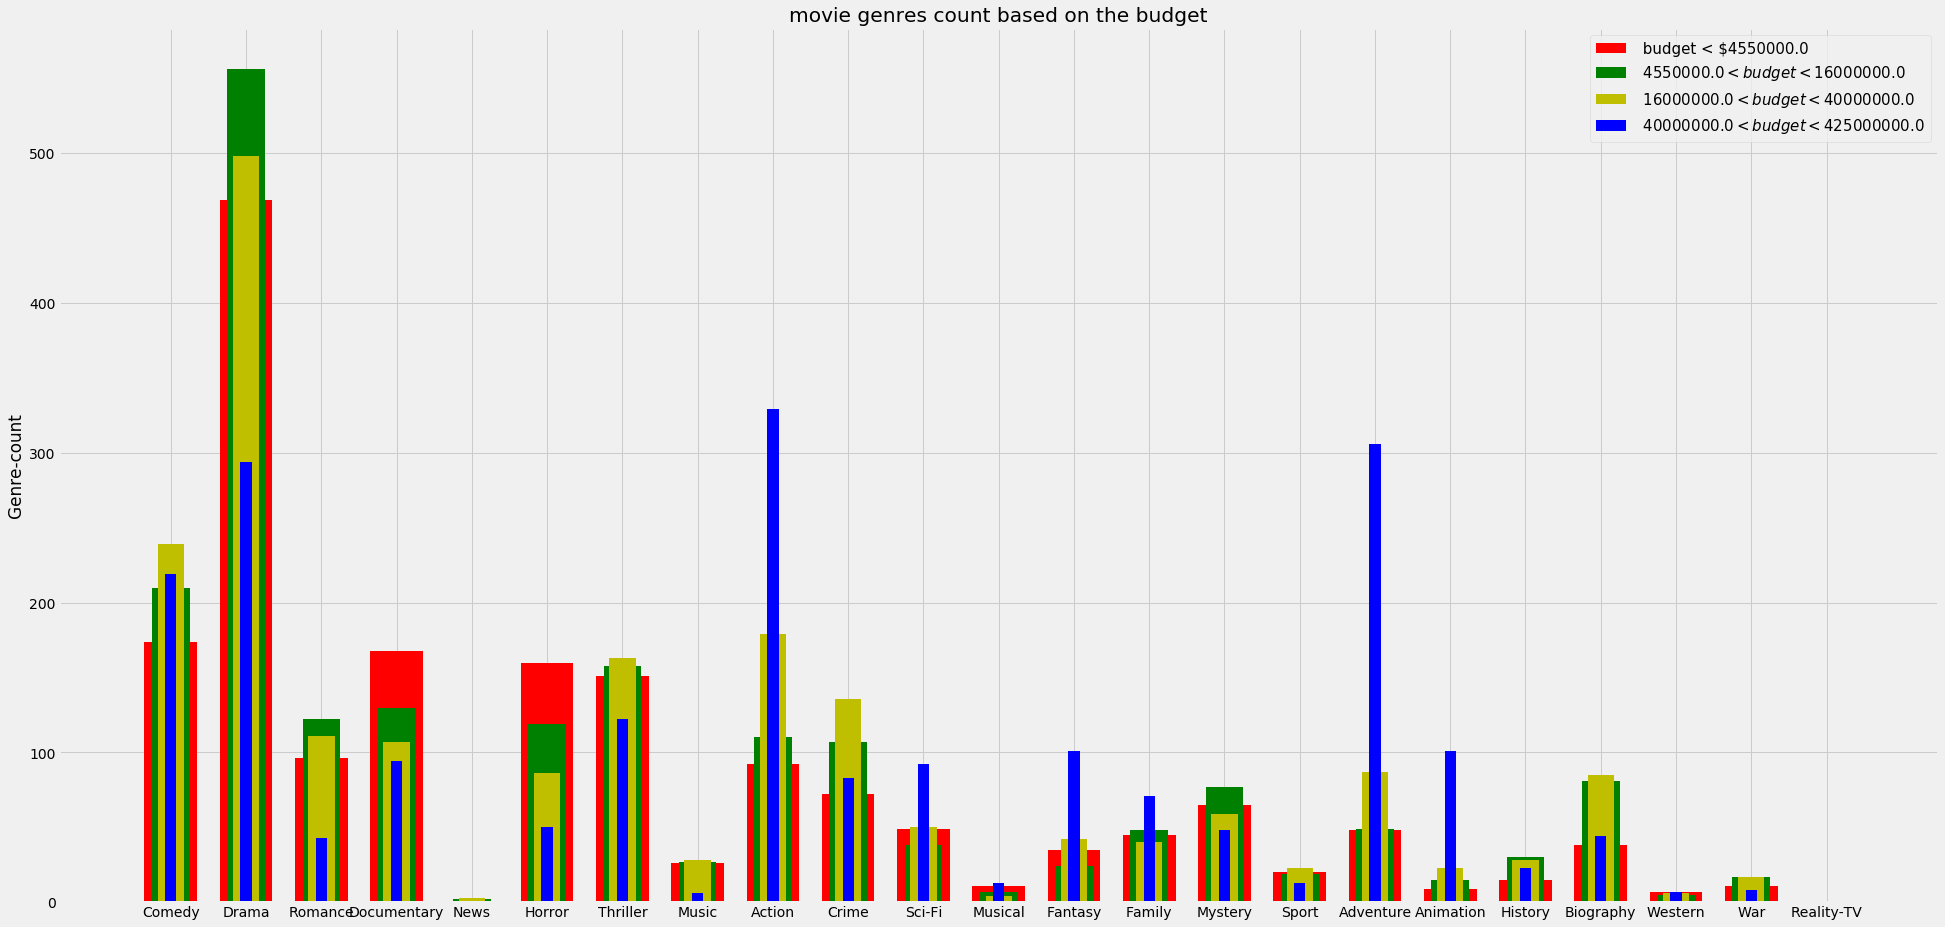

In [32]:
# creating the bar chart for movie-budget ranges:
plt.figure(figsize=(30,15))
x=np.arange(23)
plt.bar(labels_1, values_1, color="r", width=0.7, label=" budget < $4550000.0")
plt.bar(labels_2,values_2, color="g", width=0.5, label=" $4550000.0 < budget < $16000000.0")
plt.bar(labels_3, values_3, color="y", width=0.35, label=" $16000000.0 < budget < $40000000.0")
plt.bar(labels_4, values_4, color="b", width=0.15, label=" $40000000.0 < budget < $425000000.0")
plt.title("movie genres count based on the budget")
plt.ylabel("Genre-count")
plt.legend(fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

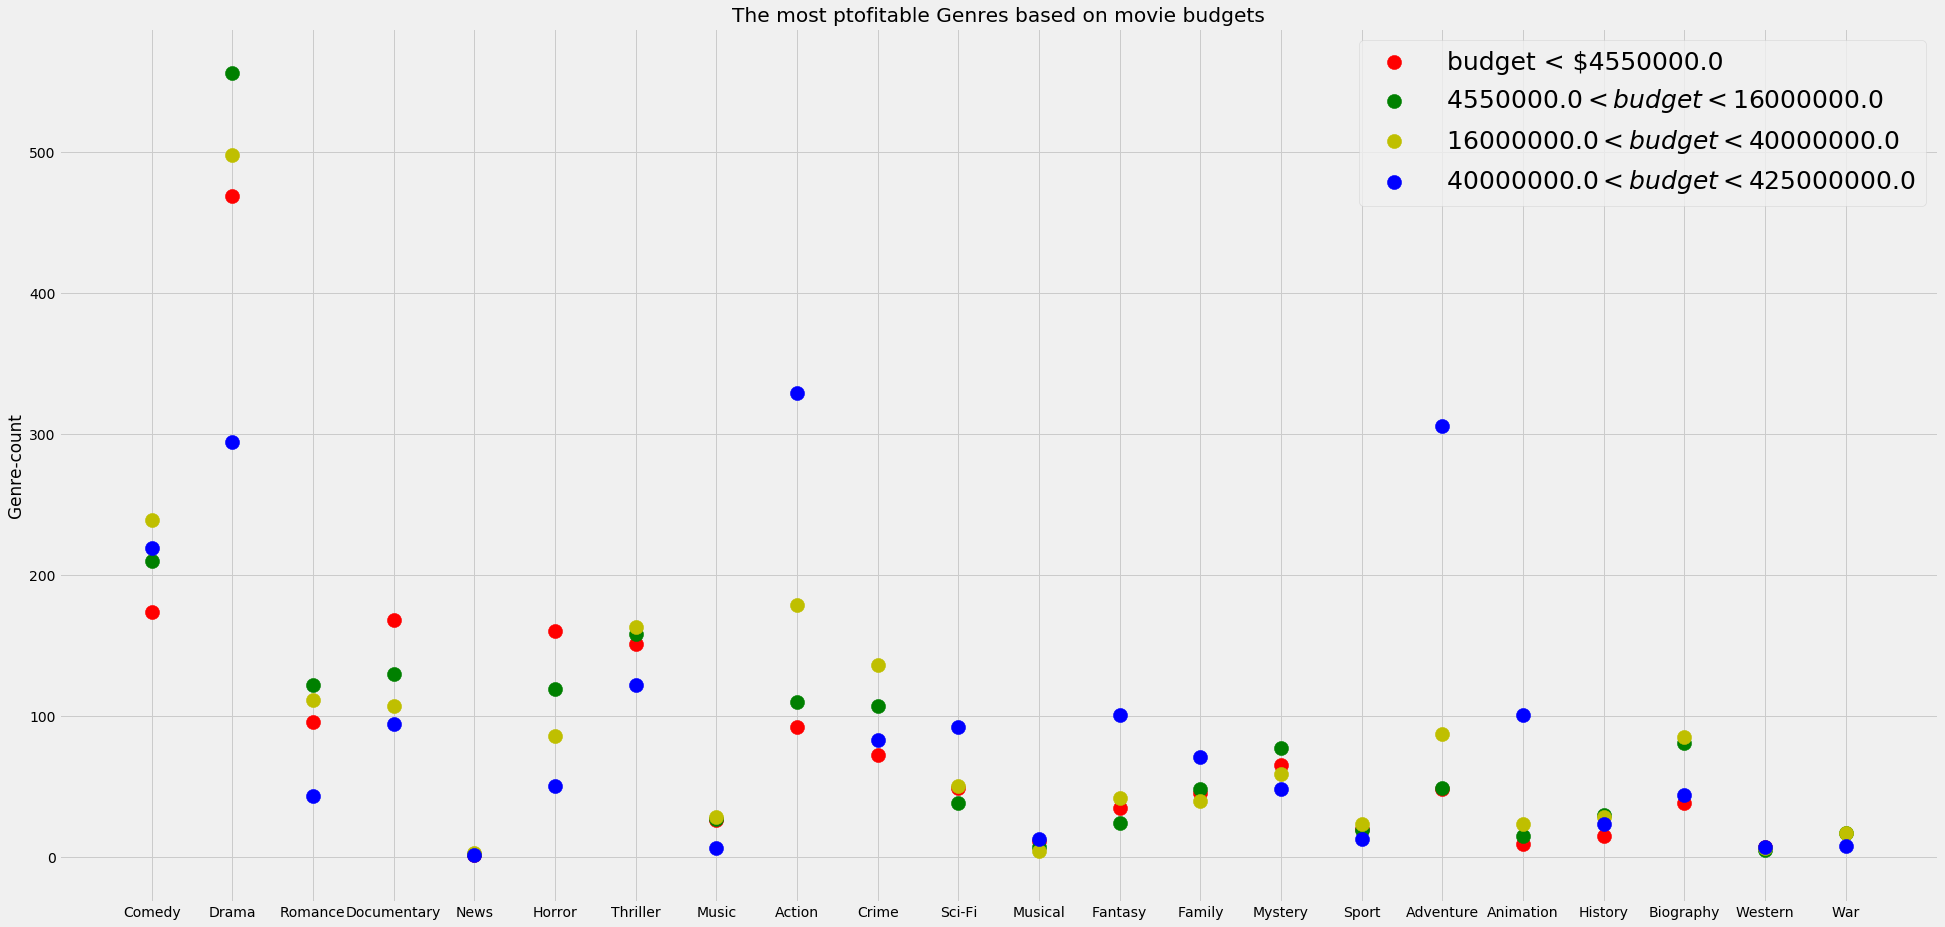

In [33]:
# creating the scatter chart for movie-budget ranges:
plt.figure(figsize=(30,15))
labels=labels_1[:21]
values=values_1[:21]
plt.scatter(labels,values,color="r",s=200,label=" budget < $4550000.0")
plt.scatter(labels_2,values_2,color="g",s=200,label=" $4550000.0 < budget < $16000000.0")
plt.scatter(labels_3,values_3,color="y",s=200,label=" $16000000.0 < budget < $40000000.0")
plt.scatter(labels_4,values_4,color="b",s=200,label=" $40000000.0 < budget < $425000000.0")
plt.title("The most ptofitable Genres based on movie budgets")
plt.ylabel("Genre-count")
plt.legend(fontsize=25)
plt.show

In [34]:
#now we are going to get some information regarding the movie crews
#we join dataframes df_movies_clean and df_title_basics_budget:
df_movies_clean.columns=["original_language","popularity","release_date","movie","vote_average","vote_count"]
df_title_basics_budget_popularity=pd.merge(df_movies_clean, df_title_basics_budget, how="inner", on="movie")
df_title_basics_budget_popularity.head()

,original_language,popularity,release_date,movie,vote_average,vote_count,tconst,original_title,start_year,runtime_minutes,genres,movie_budgets,domestic_gross,worldwide_gross,movie_net
0,en,27.920,2010-07-16,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",160000000.0,292576195.0,8.355246e+08,6.755246e+08
1,en,26.526,2009-12-18,Avatar,7.4,18676,tt1775309,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,en,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",200000000.0,415004880.0,1.068880e+09,8.688795e+08
3,en,22.020,2010-03-05,Alice in Wonderland,6.6,8713,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",200000000.0,334191110.0,1.025491e+09,8.254911e+08
4,en,22.020,2010-03-05,Alice in Wonderland,6.6,8713,tt1926979,Alice in Wonderland,2011,48.0,Documentary,200000000.0,334191110.0,1.025491e+09,8.254911e+08


In [35]:
#next step we work on the title crew table to see among those top movie genres, what producers/writers are most popular
df_title_crew= pd.read_csv(csv_files[4])
print(df_title_crew.shape)
print(df_title_crew.dropna(subset=["directors","writers"], how="any").shape)
df_title_crew_clean = df_title_crew.dropna(subset=["directors","writers"], how="any")
df_title_crew_clean

(146144, 3)
(109008, 3)


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
6,tt0996958,nm2286991,"nm2286991,nm2651190"
...,...,...,...
146137,tt8998302,nm10121510,nm10121510
146138,tt8999892,nm10122247,"nm10122247,nm10122246"
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477


In [36]:
df_title_principals=pd.read_csv(csv_files[5])
df_title_principals.dropna(subset=["tconst","nconst", "job"], how="any")
df_title_principals_clean=df_title_principals.drop(["ordering","characters"], axis=1, inplace=False)
df_title_principals_clean

,tconst,nconst,category,job
0,tt0111414,nm0246005,actor,NaN
1,tt0111414,nm0398271,director,NaN
2,tt0111414,nm3739909,producer,producer
3,tt0323808,nm0059247,editor,NaN
4,tt0323808,nm3579312,actress,NaN
...,...,...,...,...
1028181,tt9692684,nm0186469,actor,NaN
1028182,tt9692684,nm4929530,self,NaN
1028183,tt9692684,nm10441594,director,NaN
1028184,tt9692684,nm6009913,writer,writer


In [37]:
merged_crew_principals=pd.merge(df_title_crew_clean,df_title_principals_clean,how="inner", on="tconst")
merged_crew_principals

,tconst,directors,writers,nconst,category,job
0,tt0285252,nm0899854,nm0899854,nm1077681,composer,NaN
1,tt0285252,nm0899854,nm0899854,nm0960950,actor,NaN
2,tt0285252,nm0899854,nm0899854,nm0461311,actor,NaN
3,tt0285252,nm0899854,nm0899854,nm0000686,actor,NaN
4,tt0285252,nm0899854,nm0899854,nm0001822,actor,NaN
...,...,...,...,...,...,...
854868,tt9004986,nm4993825,nm4993825,nm4993825,director,NaN
854869,tt9004986,nm4993825,nm4993825,nm9008590,producer,producer
854870,tt9004986,nm4993825,nm4993825,nm1145570,composer,NaN
854871,tt9004986,nm4993825,nm4993825,nm0461754,cinematographer,NaN


In [38]:
df_name_basics= pd.read_csv(csv_files[1])
df_name_basics.head(100)
df_name_basics.dropna(subset=["nconst","primary_name"], how="any")
df_name_basics_clean=df_name_basics.drop(["birth_year","death_year","known_for_titles"],axis=1, inplace=False)
df_name_basics_clean                                        

,nconst,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [39]:
merged_basic_principals=pd.merge(df_name_basics_clean,df_title_principals_clean,how="inner", on="nconst")
merged_basic_principals

,nconst,primary_name,primary_profession,tconst,category,job
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241,producer,producer
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt0433397,composer,NaN
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt1681372,composer,NaN
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt2387710,composer,NaN
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt2281215,composer,NaN
...,...,...,...,...,...,...
1027907,nm9990381,Susan Grobes,actress,tt6527982,actress,NaN
1027908,nm9990690,Joo Yeon So,actress,tt8737130,actress,NaN
1027909,nm9991320,Madeline Smith,actress,tt8734436,actress,NaN
1027910,nm9991786,Michelle Modigliani,producer,tt8739240,producer,producer


In [40]:
merged=pd.merge(merged_crew_principals,merged_basic_principals, how="inner", on=("tconst","nconst","job","category"))
merged_clean=merged.dropna(subset=["primary_profession"], how="any").drop(["job"],axis=1,inplace=False)
merged_clean

,tconst,directors,writers,nconst,category,primary_name,primary_profession
0,tt0285252,nm0899854,nm0899854,nm1077681,composer,Fuad Javadov,"actor,composer"
1,tt0285252,nm0899854,nm0899854,nm0960950,actor,Darren Geare,"actor,composer"
2,tt0285252,nm0899854,nm0899854,nm0461311,actor,R.J. Knoll,actor
3,tt0285252,nm0899854,nm0899854,nm0000686,actor,Christopher Walken,"actor,soundtrack,miscellaneous"
4,tt0285252,nm0899854,nm0899854,nm0001822,actor,Robert Wagner,"actor,producer,soundtrack"
...,...,...,...,...,...,...,...
854741,tt9004986,nm4993825,nm4993825,nm4993825,director,Fredrik Horn Akselsen,"director,writer,assistant_director"
854742,tt9004986,nm4993825,nm4993825,nm9008590,producer,Eirin Gjørv,producer
854743,tt9004986,nm4993825,nm4993825,nm1145570,composer,John Erik Kaada,"composer,music_department,soundtrack"
854744,tt9004986,nm4993825,nm4993825,nm0461754,cinematographer,Viggo Knudsen,"camera_department,cinematographer,assistant_di..."


In [41]:
df=pd.merge(merged_clean,df_title_basics_budget,how="inner",on="tconst")
crew=df.sort_values('movie_net', ascending=False).head(1000)
crew

,tconst,directors,writers,nconst,category,primary_name,primary_profession,movie,original_title,start_year,runtime_minutes,genres,movie_budgets,domestic_gross,worldwide_gross,movie_net
414,tt1775309,nm3786927,"nm2179863,nm4392664",nm4392664,writer,Teruo Noguchi,"director,writer,editor",Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
416,tt1775309,nm3786927,"nm2179863,nm4392664",nm3328592,cinematographer,Tôru Hirao,"cinematographer,executive",Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
412,tt1775309,nm3786927,"nm2179863,nm4392664",nm3786927,director,Atsushi Wada,director,Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
411,tt1775309,nm3786927,"nm2179863,nm4392664",nm4178059,actress,Yuri Hane,actress,Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
410,tt1775309,nm3786927,"nm2179863,nm4392664",nm2929867,actress,Nako Mizusawa,actress,Avatar,Abatâ,2011,93.0,Horror,425000000.0,760507625.0,2.776345e+09,2.351345e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,tt2175671,nm1680452,nm1680452,nm3810440,composer,Toshi Sabri,"soundtrack,music_department,composer",Ghost,Ghost,2012,118.0,Horror,22000000.0,217631306.0,5.176000e+08,4.956000e+08
615,tt2175671,nm1680452,nm1680452,nm4847742,actress,Julia Bliss,actress,Ghost,Ghost,2012,118.0,Horror,22000000.0,217631306.0,5.176000e+08,4.956000e+08
614,tt2175671,nm1680452,nm1680452,nm2345675,actress,Sayali Bhagat,actress,Ghost,Ghost,2012,118.0,Horror,22000000.0,217631306.0,5.176000e+08,4.956000e+08
613,tt2175671,nm1680452,nm1680452,nm1832004,actor,Shiney Ahuja,actor,Ghost,Ghost,2012,118.0,Horror,22000000.0,217631306.0,5.176000e+08,4.956000e+08


                                 actor  count
30                            Stan Lee      9
38                          Jack Kirby      7
39                   Robert Downey Jr.      6
130                   Linda Woolverton      5
35                         Chris Evans      5
61                         Kevin Feige      5
138                        Janet Healy      5
57                          Vin Diesel      4
109  Jeanne-Marie Leprince de Beaumont      4
353                      Simon Kinberg      4
62                  Scarlett Johansson      4
345                       Ian McKellen      4
55                      Dwayne Johnson      4
52                        Chris Morgan      3
37                     Chris Hemsworth      3
144                      Pierre Coffin      3
146             Christopher Meledandri      3
40                         Chris Pratt      3
479                        Ted Elliott      3
306                  Christopher Nolan      3


Text(0.5, 0, 'number of paticipations in different roles for top 20 profitable movies')

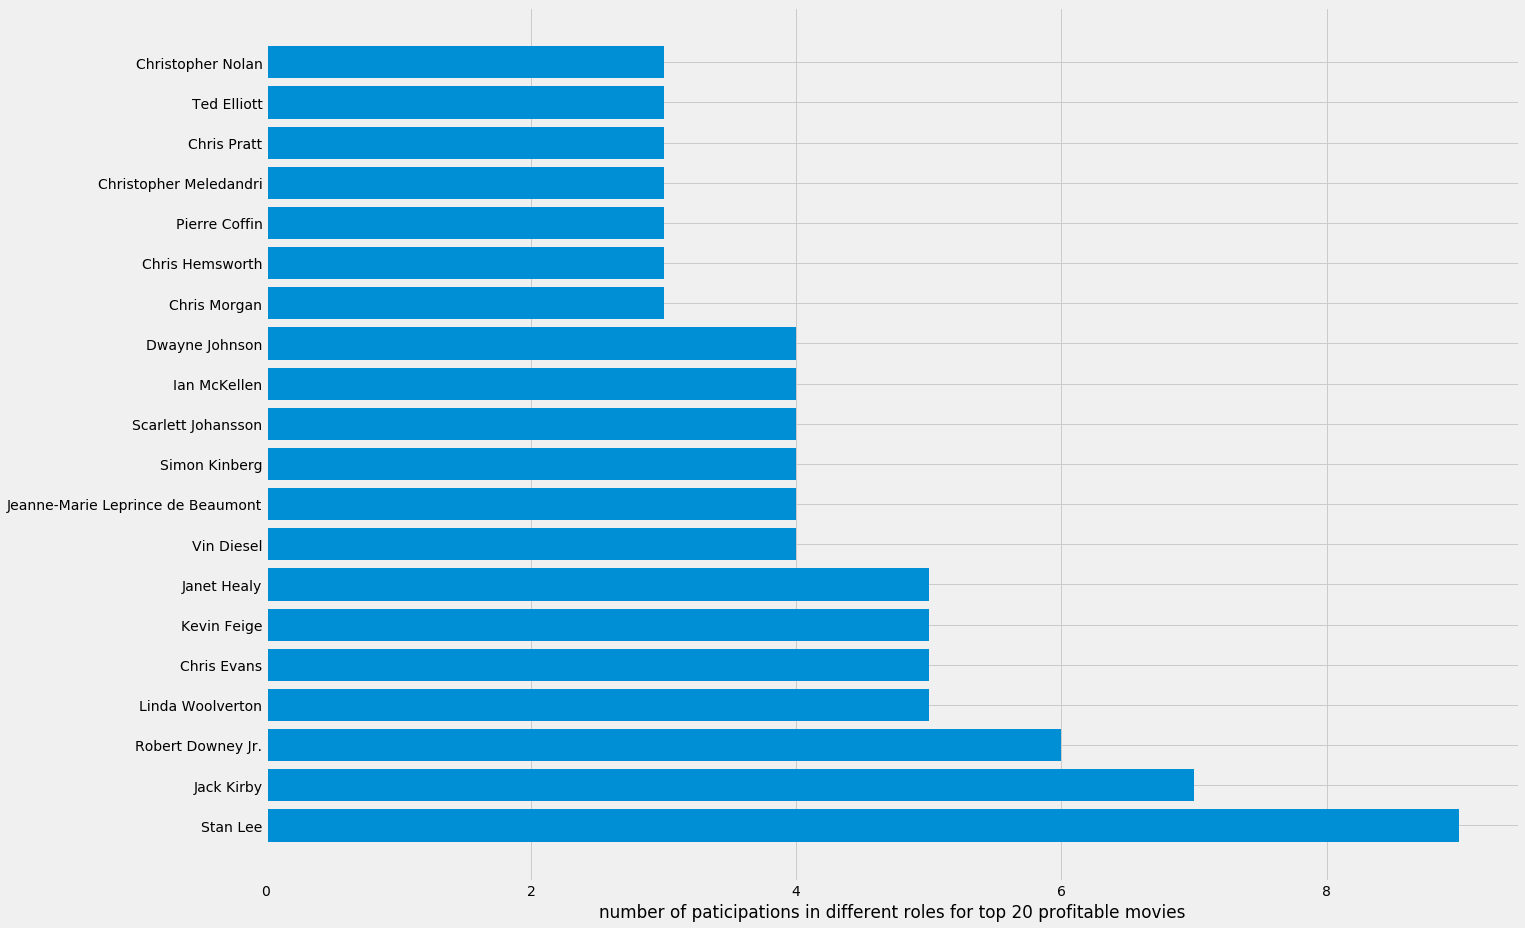

In [61]:
# ctreate a movie_crew dictionary to put all crews related to top movies

def crew_count(df,col):
    genre_dict={}
    for genres in df[col]:
        for genre in genres.split(","):
            if genre in genre_dict:
                genre_dict[genre]+=1
            else:
                genre_dict[genre]=1
    
    return genre_dict


a=crew_count(crew,"primary_name")
#print(a)
df_a = pd.DataFrame(list(a.items()),columns = ['actor','count']) 

best_actors=df_a.sort_values(by='count', ascending=False).head(20)
print(best_actors)
plt.figure(figsize=(20, 15))
plt.barh(best_actors["actor"],best_actors["count"])
#plt.title("The most popular film-crews for top 20 profitable movies")
plt.xlabel("number of paticipations in different roles for top 20 profitable movies")

In [ ]:
# this bar chart shows the top film crews among top 20 popular and profitable movies